In [3]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('New1/data/howpop_train.csv')

In [8]:
df.shape

(134137, 17)

In [9]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       
        inplace = True)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [12]:
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

In [13]:
df['published'] = pd.to_datetime(df.published, yearfirst = True)

In [15]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [16]:
df.head().T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


# 1. В каком месяце (и какого года) было больше всего публикаций?

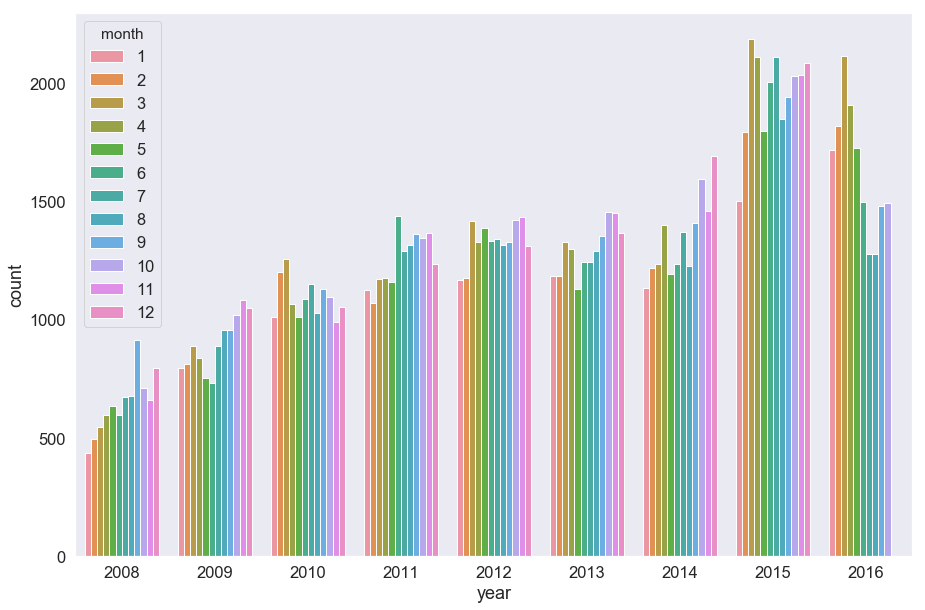

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(x='year', hue='month', data=df);
plt.show()

### Ответ: март 2015

# 2. Проанализируйте публикации в месяце из предыдущего вопроса

In [30]:
march_2015 = df[(df['year'] == 2015) & (df['month'] == 3)]

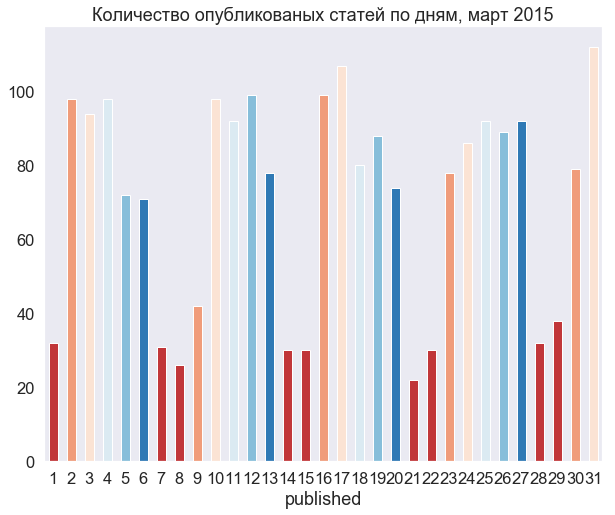

In [49]:
plt.figure(figsize=(10,8))
march_2015.groupby(df.published.dt.day)['post_id'].count().plot(kind='bar', rot=0);
plt.title('Количество опубликованых статей по дням, март 2015')
plt.show()

In [43]:
march_2015.head().T

,97666,97667,97668,97669,97670
url,https://habrahabr.ru/post/251783/,https://habrahabr.ru/company/kolibrios/blog/23...,https://habrahabr.ru/post/286286/,https://habrahabr.ru/post/251347/,https://habrahabr.ru/post/251765/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,251783,239033,286286,251347,251765
published,2015-03-01 00:00:00,2015-03-01 00:09:00,2015-03-01 07:13:00,2015-03-01 07:52:00,2015-03-01 10:30:00
author,@SLY_G,NaN,@semen_grinshtein,@Makeman,@Doomer3D
flow,develop,develop,misc,develop,develop
polling,False,False,False,False,False
content_len,49647,8581,1883,48658,40374
title,Введение в разработку слайд-шоу на JavaScript,Дайджест KolibriOS #7: как мы зиму перезимовали,"9 марта компания Apple сделает то, что не дела...",Context Model Pattern via Aero Framework,Заполнение текстовых шаблонов данными на основ...
comments,6,14,12,6,4


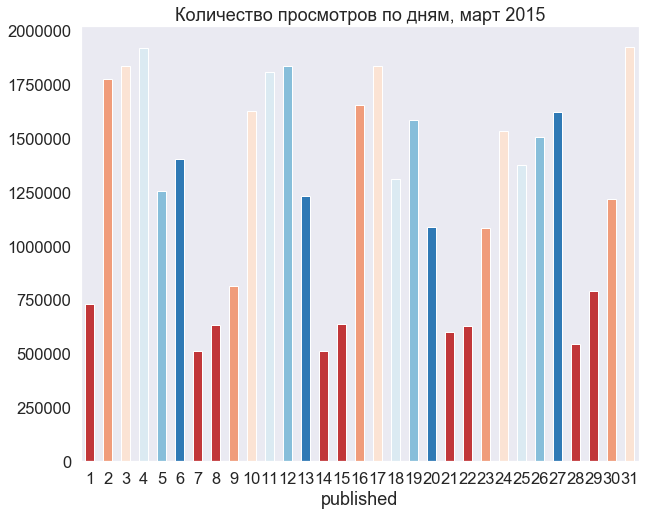

In [48]:
plt.figure(figsize=(10,8))
march_2015.groupby(df.published.dt.day)['views'].sum().plot(kind='bar', rot=0);
plt.title('Количество просмотров по дням, март 2015')
plt.show()

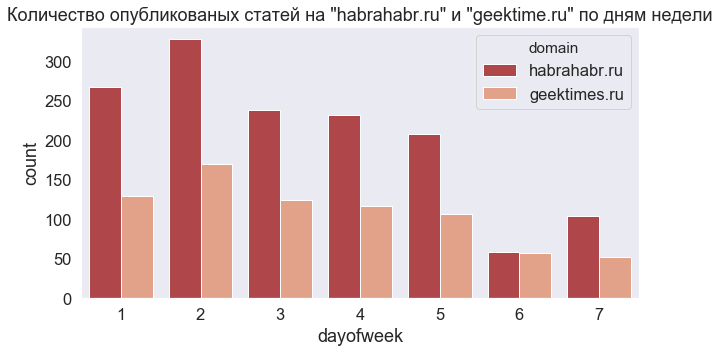

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='dayofweek', hue='domain', data=march_2015);
plt.title('Количество опубликованых статей на "habrahabr.ru" и "geektime.ru" по дням недели')
plt.show()


## По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

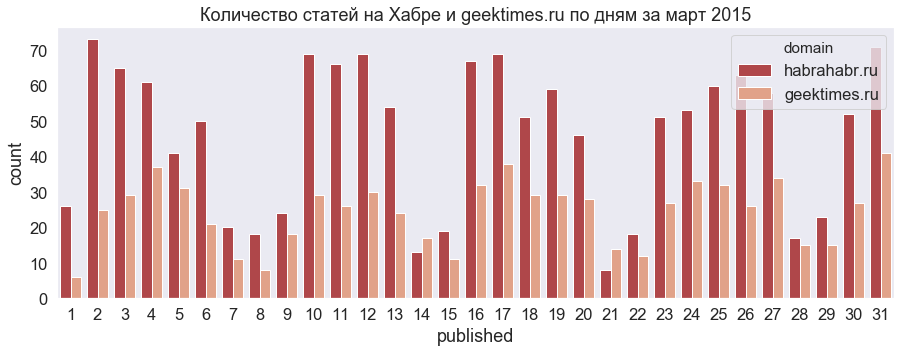

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(x=march_2015['published'].dt.day, hue='domain', data=march_2015);
plt.title('Количество статей на Хабре и geektimes.ru по дням за март 2015')
plt.show()

## За март 2015 на geektimes.ru только два раза было больше опубликованых статей чем на Хабре (14 и 21 марта)

# 3. Когда лучше всего публиковать статью?

In [63]:
df.head().T

,0,1,2,3,4
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/,https://habrahabr.ru/post/18291/,https://geektimes.ru/post/18294/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru,habrahabr.ru,geektimes.ru
post_id,18284,18285,18286,18291,18294
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00,2008-01-02 01:32:00,2008-01-02 14:34:00
author,@Tapac,@DezmASter,@DezmASter,@Taoorus,@dennydo
flow,develop,design,design,design,NaN
polling,False,False,False,False,False
content_len,4305,7344,8431,5662,3706
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ...","Сглаживание шрифтов, и субпиксельная отрисовка",Почему мне не нравится iPhone
comments,0,1,47,102,230


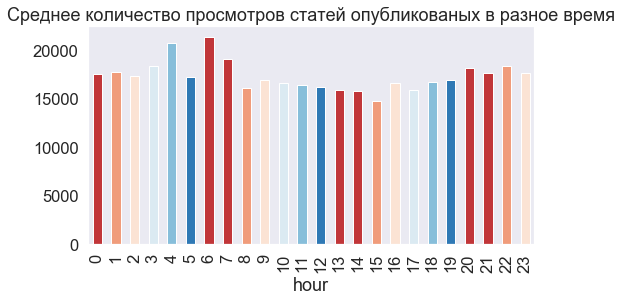

In [75]:
plt.figure(figsize=(8, 4))
df.groupby('hour')['views'].mean().plot(kind='bar');
plt.title('Среднее количество просмотров статей опубликованых в разное время')
plt.show()

## Статьи опубликованный в 6 часов утра набирают наибольшее количество просмотров

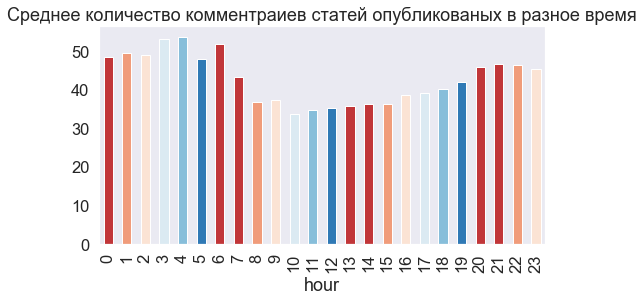

In [77]:
plt.figure(figsize=(8, 4))
df.groupby('hour')['comments'].mean().plot(kind='bar');
plt.title('Среднее количество комментраиев статей опубликованых в разное время')
plt.show()

In [78]:
df[(df['domain'] == 'geektimes.ru') & (df['comments'] == max(df['comments']))]

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,5,2


## Максимальное число просмотров на geektimes.ru набрала статья опубликованная в 2 часа ночи

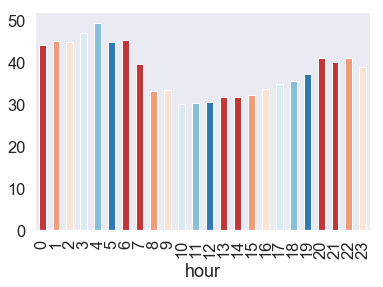

In [82]:
df[df['domain'] == 'habrahabr.ru'].groupby(['hour'])['comments'].mean().plot(kind='bar');

## На хабре дневные статьи не комментируют чаще, чем вечерние

# 4. Кого из топ-20 авторов чаще всего минусуют?

In [83]:
top_20 = df.groupby('author').count().sort_values(by='post_id', ascending=False)[0:20]
top_20_authors = [x for x in top_20.index]
top_20_authors

['@alizar',
 '@marks',
 '@SLY_G',
 '@ivansychev',
 '@semen_grinshtein',
 '@jeston',
 '@aleksandrit',
 '@XaocCPS',
 '@Mithgol',
 '@Mordatyj',
 '@Shapelez',
 '@ilya42',
 '@atomlib',
 '@ragequit',
 '@Tylerskald',
 '@andorro',
 '@jasiejames',
 '@lozga',
 '@Sterhel',
 '@Jeditobe']

In [85]:
top = df[(df['author'].isin(top_20_authors))]

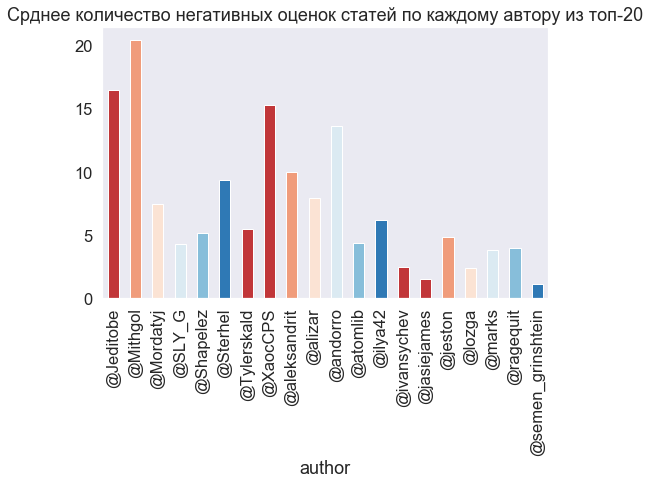

In [97]:
plt.figure(figsize=(8,5))
top.groupby('author')['votes_minus'].mean().plot(kind='bar');
plt.title('Срднее количество негативных оценок статей по каждому автору из топ-20')
plt.show()

## @Mithgol - автор, которому чаще всего ставят минус

# 5. Сравните субботы и понедельники

In [98]:
sat_mon = df[(df['dayofweek'] == 1) | (df['dayofweek'] == 6)]
sat_mon.groupby('dayofweek').mean()

,post_id,polling,content_len,comments,favs,views,votes_plus,votes_minus,year,month,hour
dayofweek,,,,,,,,,,,
1,184402.304832,0.032916,8111.358056,37.542647,75.587451,16926.030716,34.864034,7.733715,2012.675114,6.567016,13.767939
6,166978.141169,0.039618,6976.145465,48.168496,80.346181,18452.909547,43.869435,10.327549,2012.172792,6.225418,13.522912


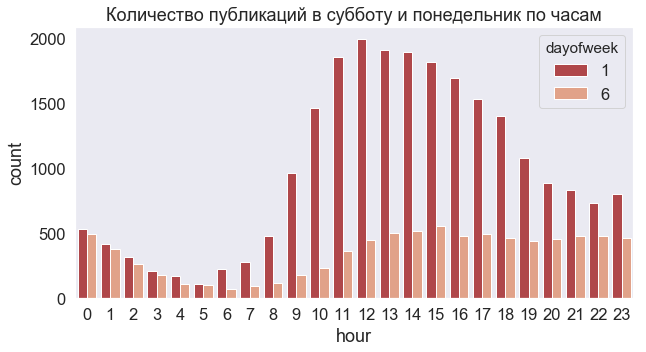

In [101]:
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', hue='dayofweek', data=sat_mon);
plt.title('Количество публикаций в субботу и понедельник по часам')
plt.show()

## Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам
## — в основном вечером? Ответ - "Нет"